In [2]:
import pandas as pd

df=pd.read_csv("./data-set-for-SLR-2025.csv")

print(df.head())

      y     x
0  7.24  0.03
1  6.31  0.05
2  8.32  0.08
3  4.79  0.10
4  5.59  0.13


In [3]:

#Run simple linear regression on the dataset
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.445367131109124
R-squared: 0.8517692767207611


Text(0, 0.5, 'y')

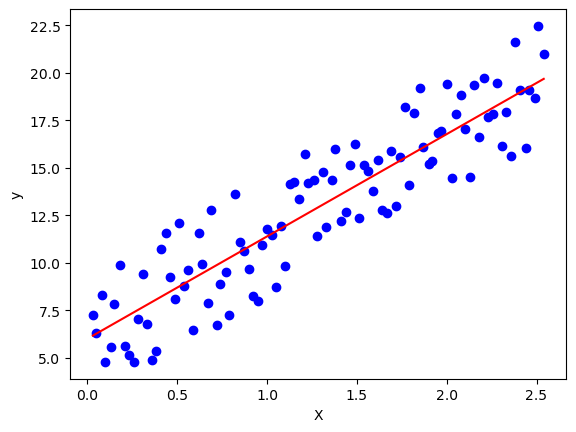

In [4]:
#plot the regression line
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')  
plt.xlabel('X')
plt.ylabel('y')

In [5]:
# I want to improve r2 score by trying polynomial regression of degree 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression() 
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)   
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression R-squared: {r2_poly}")

Polynomial Regression Mean Squared Error: 3.5169947856214163
Polynomial Regression R-squared: 0.8486876257294096


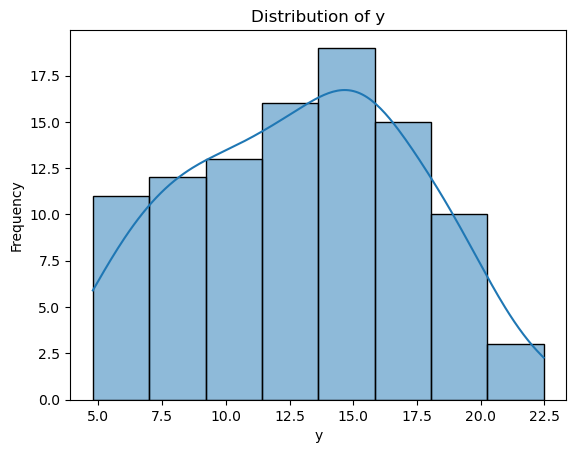

Feature Engineered Mean Squared Error: 3.516994785621417
Feature Engineered R-squared: 0.8486876257294095
Standardized Mean Squared Error: 3.445367131109125
Standardized R-squared: 0.8517692767207611
Decision Tree Mean Squared Error: 8.689779999999997
Decision Tree R-squared: 0.6261378467023325
Random Forest Mean Squared Error: 6.23162302500001
Random Forest R-squared: 0.7318956288115661


In [11]:
#it has not immproved the r2 score, try  checking imbalance in data
import seaborn as sns
sns.histplot(df['y'], kde=True)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Distribution of y')
plt.show()

#what all other techniques can be used to improve r2 score?
#1. Feature Engineering: Create new features or transform existing ones.

#try feature engineering by adding a new feature which is x squared
df['x_squared'] = df['x'] ** 2
X_new = df[['x', 'x_squared']]
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
model_new = LinearRegression()  
model_new.fit(X_train_new, y_train)
y_pred_new = model_new.predict(X_test_new)  
mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)
print(f"Feature Engineered Mean Squared Error: {mse_new}")
print(f"Feature Engineered R-squared: {r2_new}")

#no this dint help either, can we standardize the data and try again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_scaled = LinearRegression()  
model_scaled.fit(X_train_scaled, y_train)   
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"Standardized Mean Squared Error: {mse_scaled}")
print(f"Standardized R-squared: {r2_scaled}")

#no , try wih other models like decision tree regression
from sklearn.tree import DecisionTreeRegressor  
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)  
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")  

#try random forest regression
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

## Save and Load Linear Regression Model
Let's save the trained linear regression model to a file and show how to import (load) it back for future use.

In [12]:
import joblib

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')
print('Model saved as linear_regression_model.pkl')

# Load the model from file
loaded_model = joblib.load('linear_regression_model.pkl')
print('Model loaded from file')

# Use loaded model for prediction
sample_pred = loaded_model.predict(X_test)
print('Sample prediction from loaded model:', sample_pred[:5])

Model saved as linear_regression_model.pkl
Model loaded from file
Sample prediction from loaded model: [14.72778798 11.65775301 19.25205002  8.64157832 19.52135134]


## Test Imported Model on New Dataset
Let's create a new synthetic dataset and use the loaded model to make predictions.

In [13]:
import numpy as np
import pandas as pd

# Create a new synthetic dataset for testing
new_X = pd.DataFrame({'x': np.linspace(df['x'].min(), df['x'].max(), 10)})

# Predict using the loaded model
new_y_pred = loaded_model.predict(new_X)

print('New test data:')
print(new_X)
print('Predictions on new data:')
print(new_y_pred)

New test data:
          x
0  0.030000
1  0.308889
2  0.587778
3  0.866667
4  1.145556
5  1.424444
6  1.703333
7  1.982222
8  2.261111
9  2.540000
Predictions on new data:
[ 6.16400624  7.66610912  9.16821199 10.67031487 12.17241775 13.67452062
 15.1766235  16.67872637 18.18082925 19.68293212]
